In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
!ls

'ANOVA .ipynb'		  UTA-DataScience-Logo.png
'ANOVA attempt3.ipynb'	 'WON - Data Cleaning.ipynb'
 Beer_Dataset.csv	 'WON - Preprocessing.ipynb'
 Beer_Dataset2.csv	 'WON_Preprocessing (1)-Copy1.ipynb'
'Data Processing.ipynb'  'WON_Preprocessing (1).ipynb'
'NN attempt.ipynb'	  Water_Dataset.csv
 Presentation		 'attempt 1.ipynb'
 README.md		 'attempt 2.ipynb'
'TSNE attempt.ipynb'	  beer2.csv


In [3]:
beer = pd.read_csv("beer2.csv")

In [4]:
beer

,Sample,Is_QC,Abbreviation,Class,0,1,2,3,4,5,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
0,C_All_QC1,1,All,All,14285,0,0,23503,19943,44285,...,0,5507,23972,0,37642,21723,12596,3022,34593,986
1,C_All_QC2,1,All,All,70286,168078,97993,125571,106607,140786,...,0,4728,35975,0,29591,5497,8671,5616,26920,0
2,C_BLD_1,0,BLD,Blonde,74725,97020,101905,129359,112249,144078,...,3761,0,54199,0,20792,15012,0,3517,35914,1576
3,C_BLD_2,0,BLD,Blonde,94139,177158,67187,141997,175515,50697,...,0,0,657,0,30023,585,0,679,275,0
4,C_BLD_QC,1,BLD,Blonde,61199,169194,50003,131331,112077,145360,...,0,0,5363,0,31380,8519,566,0,26585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,B_STU_QC,1,STU,Stout,95728,0,0,28977,32366,25930,...,0,0,27888,0,23537,6355,1795,6378,23963,0
67,B_Water,0,Wat,Water,5178,0,0,3533,9005,8202,...,0,0,0,0,0,0,0,0,0,0
68,B_WHE_1,0,WHE,Wheat,76578,126048,81025,109281,96784,119715,...,0,0,23226,0,902,2404,3128,7053,14421,4169
69,B_WHE_2,0,WHE,Wheat,65488,69649,75504,118129,102383,127892,...,0,0,18736,0,1089,885,6292,0,13217,0


### Some columns like Sample, Abbreviation might not be useful for distinguishing between classes and could be removed

The Class column, which we want to predict, is categorical. We'll ensure it's properly encoded for machine learning models.If you want to create a model

### The Class column contains several unique beer classes, including 'All', 'Blonde', 'German', 'IPA', 'Sour', 'Stout', 'Water', and 'Wheat'. It seems that 'All' and 'Water' might not be actual beer classes but rather control or reference categories. We may need to decide how to handle these, especially 'All', which could skew the analysis if treated as a separate class.

In [5]:
beer.isnull().sum()

Sample          0
Is_QC           0
Abbreviation    0
Class           0
0               0
               ..
10810           0
10811           0
10812           0
10813           0
10814           0
Length: 10819, dtype: int64

In [6]:
beer.index

RangeIndex(start=0, stop=71, step=1)

In [7]:
beer.columns

Index(['Sample', 'Is_QC', 'Abbreviation', 'Class', '0', '1', '2', '3', '4',
       '5',
       ...
       '10805', '10806', '10807', '10808', '10809', '10810', '10811', '10812',
       '10813', '10814'],
      dtype='object', length=10819)

# Beer Sample Abbreiviations
![beer%20pic.png](attachment:beer%20pic.png)

In [8]:
print(beer['Is_QC'].unique())
print(beer['Abbreviation'].unique())
print(beer['Class'].unique())
print(beer['Sample'].unique())

[1 0]
['All' 'BLD' 'GER' 'IPA' 'SOU' 'STU' 'Wat' 'WHE']
['All' 'Blonde' 'German' 'IPA' 'Sour' 'Stout' 'Water' 'Wheat']
['C_All_QC1' 'C_All_QC2' 'C_BLD_1' 'C_BLD_2' 'C_BLD_QC' 'C_GER_1'
 'C_GER_2' 'C_GER_3' 'C_GER_4' 'C_GER_5' 'C_GER_6' 'C_GER_QC' 'C_IPA_1'
 'C_IPA_2' 'C_IPA_QC' 'C_SOU_1' 'C_SOU_2' 'C_SOU_QC' 'C_STU_1' 'C_STU_2'
 'C_STU_QC' 'C_Water' 'C_WHE_1' 'C_WHE_2' 'C_WHE_QC' 'A_BLD_1' 'A_BLD_2'
 'A_BLD_QC' 'A_GER_1' 'A_GER_2' 'A_GER_3' 'A_GER_4' 'A_GER_5' 'A_GER_6'
 'A_GER_QC' 'A_IPA_1' 'A_IPA_2' 'A_IPA_QC' 'A_SOU_1' 'A_SOU_2' 'A_SOU_QC'
 'A_STU_1' 'A_STU_2' 'A_WHE_1' 'A_WHE_2' 'A_WHE_QC' 'B_All_QC1'
 'B_All_QC2' 'B_BLD_1' 'B_BLD_2' 'B_BLD_QC' 'B_GER_1' 'B_GER_2' 'B_GER_3'
 'B_GER_4' 'B_GER_5' 'B_GER_6' 'B_GER_QC' 'B_IPA_1' 'B_IPA_2' 'B_IPA_QC'
 'B_SOU_1' 'B_SOU_2' 'B_SOU_QC' 'B_STU_1' 'B_STU_2' 'B_STU_QC' 'B_Water'
 'B_WHE_1' 'B_WHE_2' 'B_WHE_QC']


In [9]:
unique_classes = beer['Class'].unique()
num_classes = len(unique_classes)
print(unique_classes)
print("Number of classes:", num_classes)

['All' 'Blonde' 'German' 'IPA' 'Sour' 'Stout' 'Water' 'Wheat']
Number of classes: 8


In [10]:
beer

,Sample,Is_QC,Abbreviation,Class,0,1,2,3,4,5,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
0,C_All_QC1,1,All,All,14285,0,0,23503,19943,44285,...,0,5507,23972,0,37642,21723,12596,3022,34593,986
1,C_All_QC2,1,All,All,70286,168078,97993,125571,106607,140786,...,0,4728,35975,0,29591,5497,8671,5616,26920,0
2,C_BLD_1,0,BLD,Blonde,74725,97020,101905,129359,112249,144078,...,3761,0,54199,0,20792,15012,0,3517,35914,1576
3,C_BLD_2,0,BLD,Blonde,94139,177158,67187,141997,175515,50697,...,0,0,657,0,30023,585,0,679,275,0
4,C_BLD_QC,1,BLD,Blonde,61199,169194,50003,131331,112077,145360,...,0,0,5363,0,31380,8519,566,0,26585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,B_STU_QC,1,STU,Stout,95728,0,0,28977,32366,25930,...,0,0,27888,0,23537,6355,1795,6378,23963,0
67,B_Water,0,Wat,Water,5178,0,0,3533,9005,8202,...,0,0,0,0,0,0,0,0,0,0
68,B_WHE_1,0,WHE,Wheat,76578,126048,81025,109281,96784,119715,...,0,0,23226,0,902,2404,3128,7053,14421,4169
69,B_WHE_2,0,WHE,Wheat,65488,69649,75504,118129,102383,127892,...,0,0,18736,0,1089,885,6292,0,13217,0


#  Normalizing Feature Values

In [11]:
#extracting only the feature columns (excluding the quality control column)
numeric_columns = beer.select_dtypes(include=['int64']).columns[1:]
X_features = beer[numeric_columns]
#apply z-score normalization
X_normalized = (X_features - X_features.mean()) / X_features.std()
#replacing original feature values with normalized values
beer[numeric_columns] = X_normalized

In [12]:
beer

,Sample,Is_QC,Abbreviation,Class,0,1,2,3,4,5,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
0,C_All_QC1,1,All,All,-1.868298,-1.567441,-1.276954,-1.354611,-1.766998,-0.851681,...,-0.282863,0.410386,0.477931,-0.588307,0.801422,1.457427,1.709433,0.061105,1.176980,-0.182103
1,C_All_QC2,1,All,All,0.232623,1.416510,0.499485,0.090876,0.230586,0.379996,...,-0.282863,0.299919,1.441388,-0.588307,0.377457,-0.396710,0.987809,0.506136,0.686011,-0.308890
2,C_BLD_1,0,BLD,Blonde,0.399156,0.154991,0.570403,0.144521,0.360633,0.422013,...,0.548661,-0.370542,2.904191,-0.588307,-0.085898,0.690564,-0.606381,0.146028,1.261507,-0.106237
3,C_BLD_2,0,BLD,Blonde,1.127487,1.577711,-0.058973,0.323500,1.818899,-0.769842,...,-0.282863,-0.370542,-1.393516,-0.588307,0.400206,-0.958002,-0.606381,-0.340864,-1.018912,-0.308890
4,C_BLD_QC,1,BLD,Blonde,-0.108283,1.436323,-0.370489,0.172449,0.356668,0.438375,...,-0.282863,-0.370542,-1.015775,-0.588307,0.471666,-0.051387,-0.502321,-0.457354,0.664576,-0.308890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,B_STU_QC,1,STU,Stout,1.187100,-1.567441,-1.276954,-1.277088,-1.480651,-1.085952,...,-0.282863,-0.370542,0.792261,-0.588307,0.058654,-0.298667,-0.276365,0.636866,0.496803,-0.308890
67,B_Water,0,Wat,Water,-2.209954,-1.567441,-1.276954,-1.637426,-2.019116,-1.312221,...,-0.282863,-0.370542,-1.446252,-0.588307,-1.180804,-1.024849,-0.606381,-0.457354,-1.036508,-0.308890
68,B_WHE_1,0,WHE,Wheat,0.468672,0.670336,0.191885,-0.139823,0.004168,0.111059,...,-0.282863,-0.370542,0.418051,-0.588307,-1.133305,-0.750146,-0.031289,0.752670,-0.113757,0.227190
69,B_WHE_2,0,WHE,Wheat,0.052622,-0.330936,0.091799,-0.014518,0.133224,0.215425,...,-0.282863,-0.370542,0.057648,-0.588307,-1.123457,-0.923721,0.550423,-0.457354,-0.190797,-0.308890


In [13]:
beer.drop(columns=['Abbreviation'], inplace=True)


In [14]:
beer

,Sample,Is_QC,Class,0,1,2,3,4,5,6,...,10805,10806,10807,10808,10809,10810,10811,10812,10813,10814
0,C_All_QC1,1,All,-1.868298,-1.567441,-1.276954,-1.354611,-1.766998,-0.851681,-1.320698,...,-0.282863,0.410386,0.477931,-0.588307,0.801422,1.457427,1.709433,0.061105,1.176980,-0.182103
1,C_All_QC2,1,All,0.232623,1.416510,0.499485,0.090876,0.230586,0.379996,0.118426,...,-0.282863,0.299919,1.441388,-0.588307,0.377457,-0.396710,0.987809,0.506136,0.686011,-0.308890
2,C_BLD_1,0,Blonde,0.399156,0.154991,0.570403,0.144521,0.360633,0.422013,0.191867,...,0.548661,-0.370542,2.904191,-0.588307,-0.085898,0.690564,-0.606381,0.146028,1.261507,-0.106237
3,C_BLD_2,0,Blonde,1.127487,1.577711,-0.058973,0.323500,1.818899,-0.769842,1.820090,...,-0.282863,-0.370542,-1.393516,-0.588307,0.400206,-0.958002,-0.606381,-0.340864,-1.018912,-0.308890
4,C_BLD_QC,1,Blonde,-0.108283,1.436323,-0.370489,0.172449,0.356668,0.438375,0.205066,...,-0.282863,-0.370542,-1.015775,-0.588307,0.471666,-0.051387,-0.502321,-0.457354,0.664576,-0.308890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,B_STU_QC,1,Stout,1.187100,-1.567441,-1.276954,-1.277088,-1.480651,-1.085952,-1.184807,...,-0.282863,-0.370542,0.792261,-0.588307,0.058654,-0.298667,-0.276365,0.636866,0.496803,-0.308890
67,B_Water,0,Water,-2.209954,-1.567441,-1.276954,-1.637426,-2.019116,-1.312221,-1.598158,...,-0.282863,-0.370542,-1.446252,-0.588307,-1.180804,-1.024849,-0.606381,-0.457354,-1.036508,-0.308890
68,B_WHE_1,0,Wheat,0.468672,0.670336,0.191885,-0.139823,0.004168,0.111059,-0.078209,...,-0.282863,-0.370542,0.418051,-0.588307,-1.133305,-0.750146,-0.031289,0.752670,-0.113757,0.227190
69,B_WHE_2,0,Wheat,0.052622,-0.330936,0.091799,-0.014518,0.133224,0.215425,0.037631,...,-0.282863,-0.370542,0.057648,-0.588307,-1.123457,-0.923721,0.550423,-0.457354,-0.190797,-0.308890


## **Random Forest classifierto find most important variables helping to distinguish between beer classes**

In [15]:

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import GridSearchCV

In [16]:
beer = pd.read_csv("beer2.csv")

In [17]:
# Remove unnecessary columns - Assuming 'Sample' and 'Abbreviation' are not needed for the analysis
data_cleaned = beer.drop(['Sample', 'Abbreviation'], axis=1)

missing_values = data_cleaned.isnull().sum().sum()

unique_classes = data_cleaned['Class'].unique()

qc_distribution = data_cleaned['Is_QC'].value_counts(normalize=True)

missing_values, unique_classes, qc_distribution


(0,
 array(['All', 'Blonde', 'German', 'IPA', 'Sour', 'Stout', 'Water',
        'Wheat'], dtype=object),
 0    0.704225
 1    0.295775
 Name: Is_QC, dtype: float64)

In [18]:
# Exclude QC samples
data_no_qc = data_cleaned[data_cleaned['Is_QC'] == 0].drop('Is_QC', axis=1)

# Here, I ll exclude 'All' and 'Water' classes
data_final = data_no_qc[~data_no_qc['Class'].isin(['All', 'Water'])]

# Encode the 'Class' column using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_final['Class'] = le.fit_transform(data_final['Class'])

# Prepare features (X) and target (y) for model training
X = data_final.drop('Class', axis=1)
y = data_final['Class']



/tmp/ipykernel_1447/1562091416.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['Class'] = le.fit_transform(data_final['Class'])


In [19]:
# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features and the encoded classes
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Class'] = y.reset_index(drop=True)  # Reset index for proper alignment

X_scaled_df.head(), le.classes_

(          0         1         2         3         4         5         6  \
 0  0.312622  0.096870  0.423271  0.044724  0.210874  0.273227  0.033626   
 1  1.098078  1.737023 -0.180330  0.261682  1.763597 -0.832383  1.573565   
 2  0.786064  1.531149  0.492031  0.056690  0.839194 -0.578621  1.139790   
 3  0.410814  1.696929  0.235504  0.099024  0.269532  0.304259  0.073222   
 4  1.197565  0.079842  4.073598  0.154594  0.391043  0.339553  0.132934   
 
           7         8         9  ...     10806     10807     10808     10809  \
 0  2.397515  0.786249  0.975973  ... -0.309446  2.824144 -0.676054 -0.062471   
 1  0.610166  1.784822  0.765930  ... -0.309446 -1.391050 -0.676054  0.411954   
 2 -0.801088  0.130902  1.056051  ... -0.309446  0.173883 -0.676054  0.316565   
 3  0.588754  2.517831  0.886464  ... -0.118015  1.362108 -0.676054  0.392269   
 4 -0.128945 -0.184968  1.010205  ... -0.309446  0.848021 -0.422719  0.168034   
 
       10810     10811     10812     10813     10814  

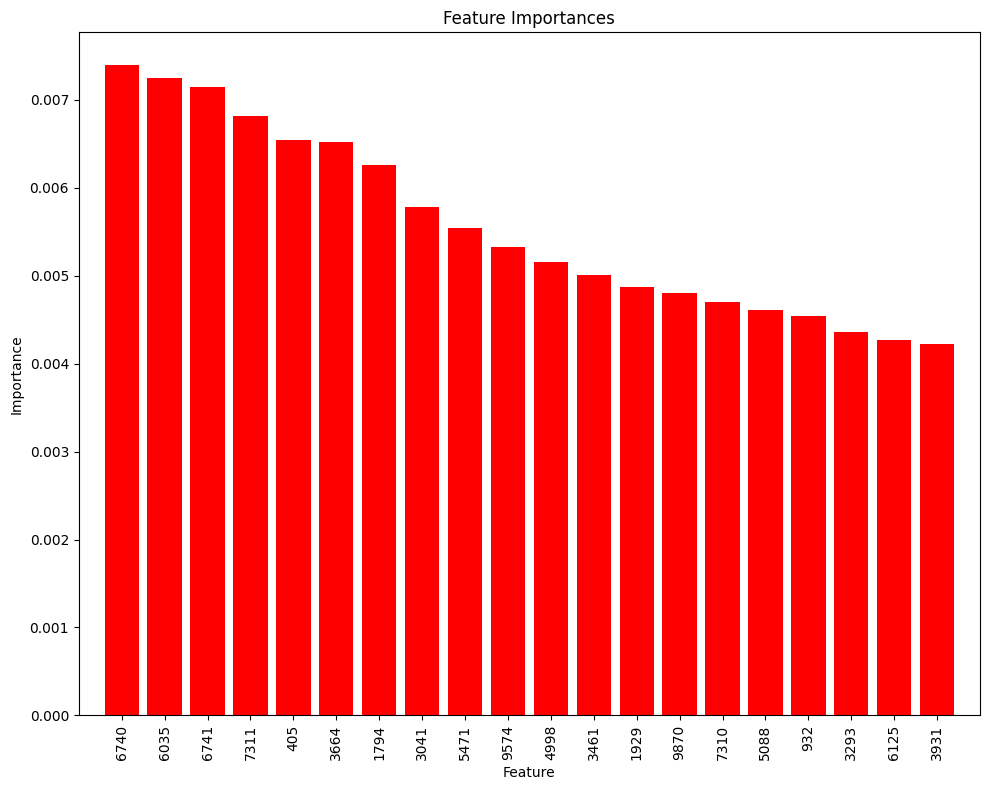

,Feature,Importance
0,6740,0.007399
1,6035,0.007252
2,6741,0.007144
3,7311,0.006820
4,405,0.006546
5,3664,0.006522
6,1794,0.006261
7,3041,0.005781
8,5471,0.005542
9,9574,0.005322


In [20]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_scaled, y)

# Get feature importances
importances = rf.feature_importances_

# Sort the feature importances
indices = np.argsort(importances)[::-1]

# Select the top 20 features
top_20_indices = indices[:20]
top_20_importances = importances[top_20_indices]
top_20_features = X.columns[top_20_indices]

# Calculate the cumulative sum of feature importances for explanation
cumulative_importances = np.cumsum(top_20_importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.bar(range(len(top_20_indices)), top_20_importances, color='r', align='center')
plt.xticks(range(len(top_20_indices)), top_20_features, rotation=90)
plt.xlim([-1, len(top_20_indices)])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 20 features
top_20_features_importances = pd.DataFrame({'Feature': top_20_features, 'Importance': top_20_importances})
top_20_features_importances


In [21]:
# Calculate the total variation explained by the top 20 features
total_variation_explained = cumulative_importances[-1]
total_variation_explained


0.11114070639915732

### This was just one method to find the top 20 important features and these 20 variables explain 11 % of variations.

### Also, I Created t-SNE model to see using non linear model can we cluster different beer classes that it seems it worked very well.

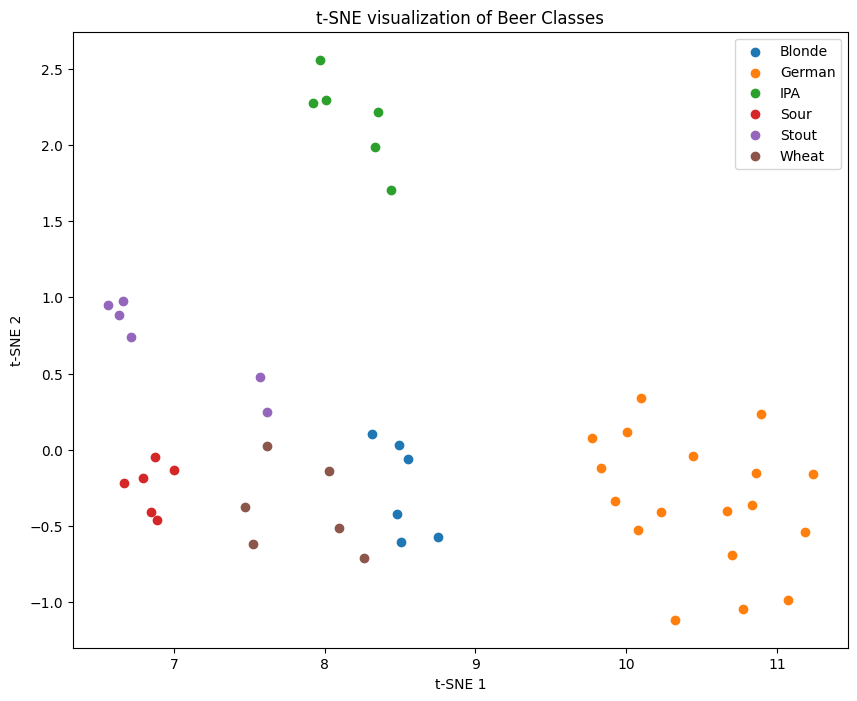

In [22]:
from sklearn.manifold import TSNE

# Selecting only the top 20 features for t-SNE visualization
X_top_20 = X_scaled[:, top_20_indices]

# Initialize and fit the t-SNE model
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_top_20)

# Plotting the results
plt.figure(figsize=(10, 8))

# Different classes have been encoded from 0 onwards; plotting each class
for class_id in np.unique(y):
    plt.scatter(X_tsne[y == class_id, 0], X_tsne[y == class_id, 1], label=le.inverse_transform([class_id])[0])

plt.title('t-SNE visualization of Beer Classes')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


In [23]:
from sklearn.decomposition import PCA

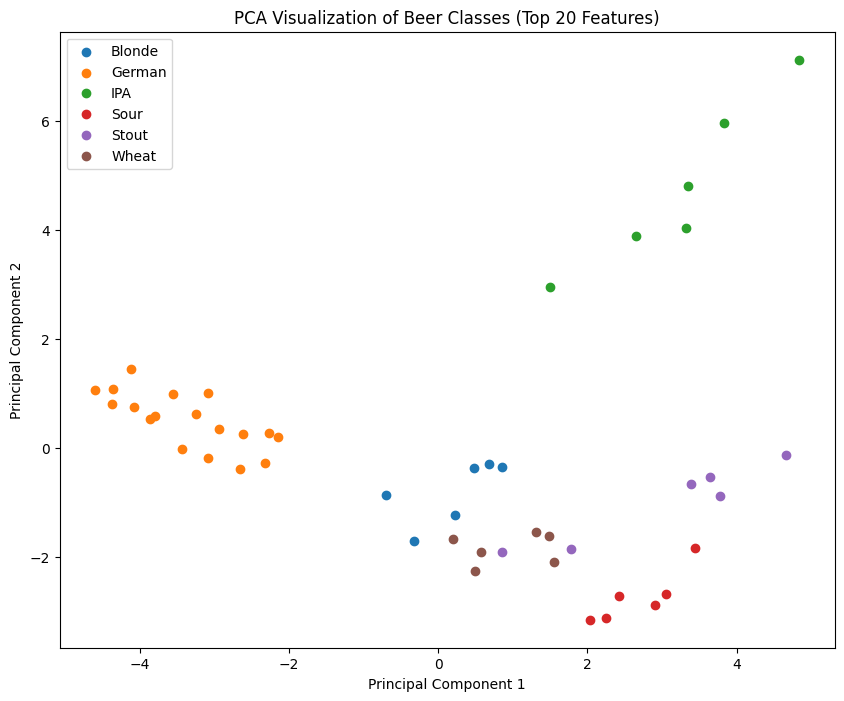

In [24]:
# Initialize and fit the PCA model
pca = PCA(n_components=2, random_state=42)
X_pca_top_20 = pca.fit_transform(X_top_20)

# Plotting the results
plt.figure(figsize=(10, 8))

# Different classes have been encoded from 0 onwards; plotting each class
for class_id in np.unique(y):
    plt.scatter(X_pca_top_20[y == class_id, 0], X_pca_top_20[y == class_id, 1], label=le.inverse_transform([class_id])[0])

plt.title('PCA Visualization of Beer Classes (Top 20 Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

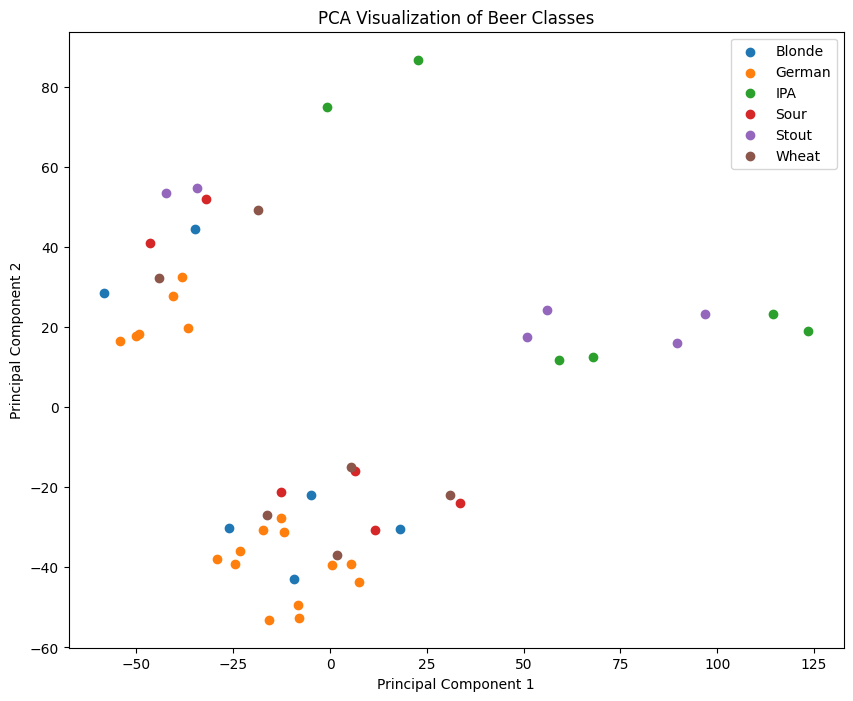

In [25]:
plt.figure(figsize=(10, 8))
# Different classes have been encoded from 0 onwards; plotting each class
for class_id in np.unique(y):
    plt.scatter(X_pca[y == class_id, 0], X_pca[y == class_id, 1], label=le.inverse_transform([class_id])[0])

plt.title('PCA Visualization of Beer Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [26]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [40]:
top_100_indices = indices[:20]
top_100_importances = importances[top_100_indices]
top_100_features = X.columns[top_100_indices]
cumulative_importances = np.cumsum(top_100_importances)


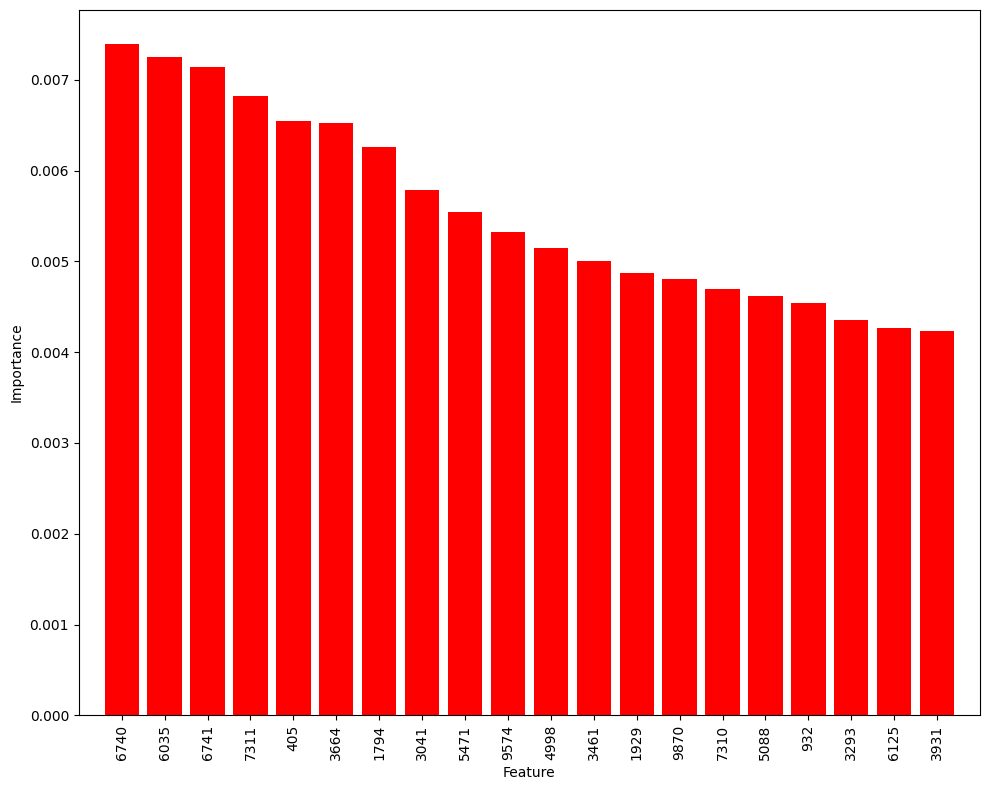

In [41]:
plt.figure(figsize=(10, 8))
plt.bar(range(len(top_100_indices)), top_100_importances, color='r', align='center')
plt.xticks(range(len(top_100_indices)), top_100_features, rotation=90)
plt.xlim([-1, len(top_100_indices)])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()


In [42]:
total_variation_explained = cumulative_importances[-1]
print(total_variation_explained)

0.11114070639915732


In [43]:
from sklearn.manifold import TSNE

# Initialize t-SNE with 2 components (for 2D visualization)
tsne = TSNE(n_components=2, random_state=42)

# Selecting only the top 100 features for t-SNE visualization
X_top_100 = X_scaled[:, top_100_indices]

# Fit the t-SNE model
X_tsne_top_100 = tsne.fit_transform(X_top_100)



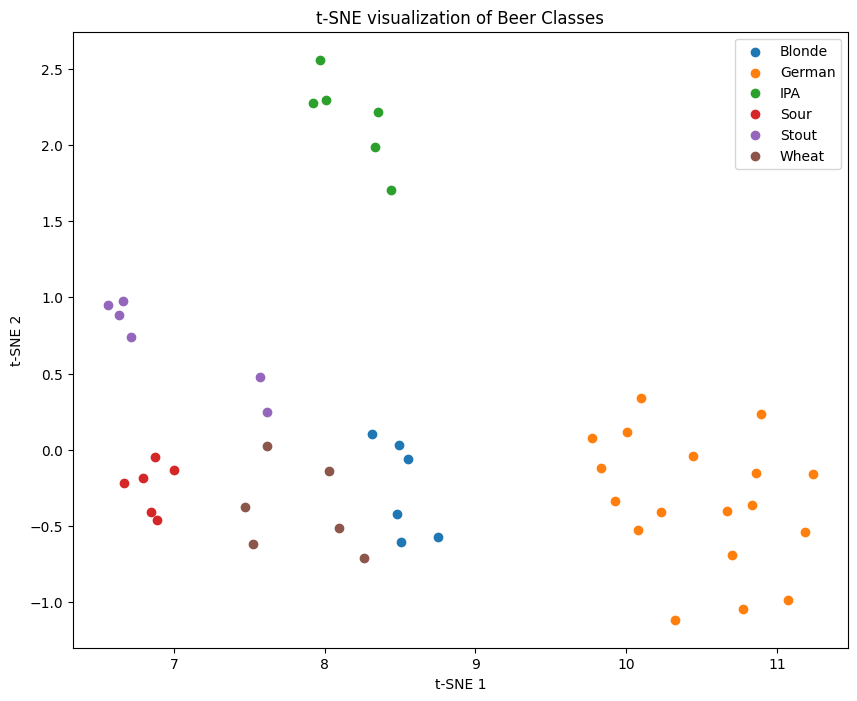

In [44]:
from sklearn.manifold import TSNE

# Selecting only the top 20 features for t-SNE visualization
X_top_100 = X_scaled[:, top_100_indices]

# Initialize and fit the t-SNE model
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_top_100)

# Plotting the results
plt.figure(figsize=(10, 8))

# Different classes have been encoded from 0 onwards; plotting each class
for class_id in np.unique(y):
    plt.scatter(X_tsne[y == class_id, 0], X_tsne[y == class_id, 1], label=le.inverse_transform([class_id])[0])

plt.title('t-SNE visualization of Beer Classes')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()
